# Image Smoothing

## Image Filtering

이미지를 주파수로 표현할 수 있다.
일반적으로 고주파는 밝기의 변화가 많은 곳(경계선), 저주파는 밝기의 변화가 적은 곳 (배경)에서 나타남
따라서 고주파를 제거하면 blur 처리가 되며, 저주파를 제거하면 대상의 영역을 확인할 수 있다.

Low-pass filter(LPF)를 사용하여 노이즈 제거와 blur 처리를 할 수 있으며,
High-pass filter(HPF)를 적용하면 경계선을 찾을 수 있다.

각 픽셀을 기점으로 합성곱 처리 후 평균값을 픽셀에 적용한다

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

img = cv2.imread("Images/Sample_mili3.jpg")

cv2.namedWindow('image')
cv2.createTrackbar('K', 'image', 1, 20, nothing)

while(1):
    if cv2.waitKey(1) & 0xFF == 27:
        break
    k = cv2.getTrackbarPos('K', 'image')
    
    # (0, 0) 이면 에러가 발생하므로 1로 치환
    if k == 0:
        k = 1
        
    kernel = np.ones((k, k), np.float32)/(k^2)
    dst = cv2.filter2D(img, -1, kernel) # cv2.filter2D(원본, 이미지의 깊이(-1이면 원본이랑 같게), 커널, ...)
    
    cv2.imshow('image', dst)
    
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Image Blurring
이미지 Blurring 은 low-pass filter 을 적용한다.

`cv2.blur(src, ksize)` : 동일한 수를 이용한 필터
- src
- ksize : 커널 사이즈

`cv2.GaussianBlur(img, ksize, sigmaX)` : 가우시안 필터를 이용함
- sigmaX = Gaussian의 standard deviation(in X)

`cv2.midianBlur(src, ksize)` : 필터 내에 들어온 값 중 중간값을 사용한다

`cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)`
- src : 8bit 1, 3channel
- d : filtering시 고려할 주변 pixel 지름
- sigmaColor : Color를 고려할 공간. 숫자가 크면 멀리 있는 pixel도 고려함
- sigmaSpace : 숫자가 크면 멀리 있는 pixel도 고려함

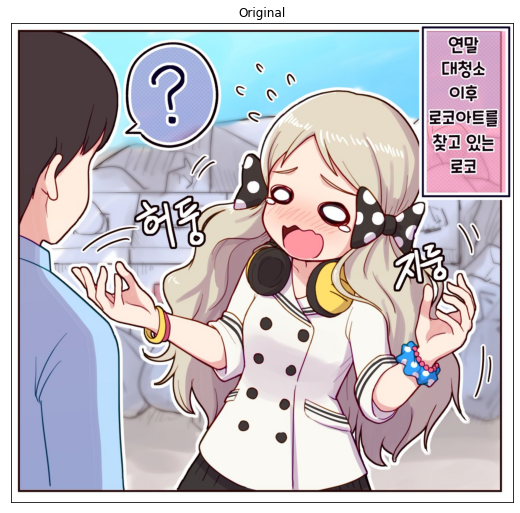

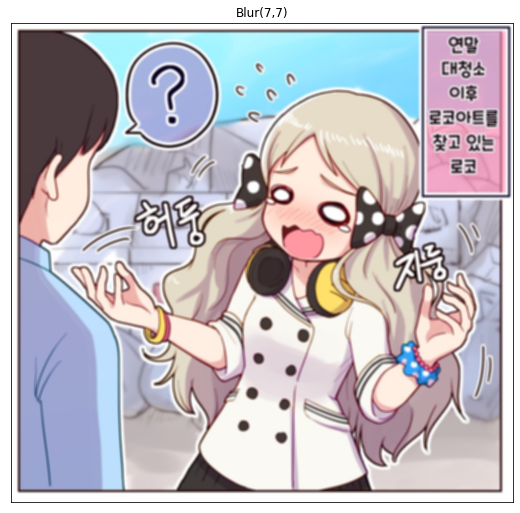

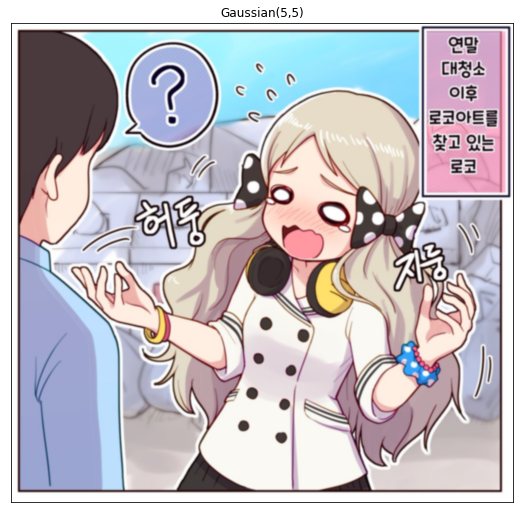

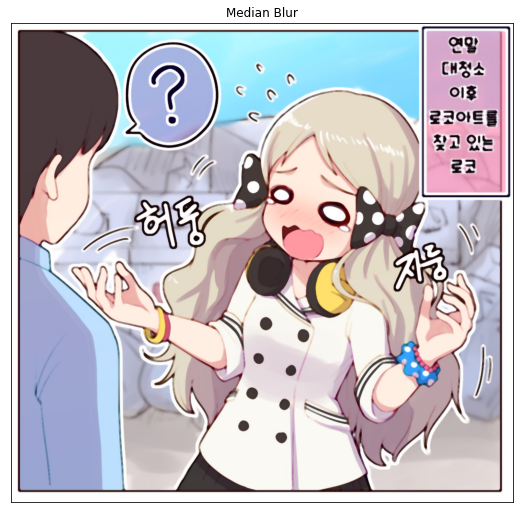

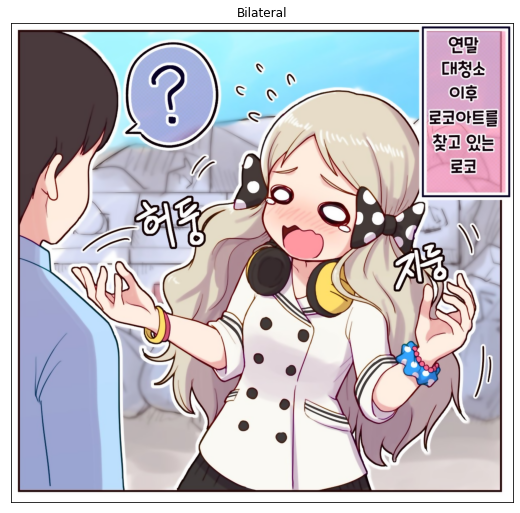

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/Sample_mili4.jpg")

# BGR => RGB
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])

# 일반 Blur
dst1 = cv2.blur(img, (7,7))

# Gaussian Blur
dst2 = cv2.GaussianBlur(img, (7, 7), 0)

# Median Filtering
dst3 = cv2.medianBlur(img, 7)

# Bilateral Filtering
dst4 = cv2.bilateralFilter(img, 7, 75, 75)

images = [img, dst1, dst2, dst3, dst4]
titles = ["Original", "Blur(7,7)", "Gaussian(5,5)", "Median Blur", "Bilateral"]

for i in range(5):
    plt.figure(figsize=(30,30))
    plt.subplot(3,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()